In [126]:
import numpy as np
from keras.utils import np_utils

In [124]:

train_data = np.genfromtxt('trainImage.csv', delimiter=',')
train_labels = np.genfromtxt('trainLabel.csv', delimiter=',')

test_data = np.genfromtxt('testImage.csv', delimiter=',')
test_labels = np.genfromtxt('testLabel.csv', delimiter=',')


In [127]:
def vectorize_labels(l):
    vec = [np.asarray(0) for i in range(10)]
    vec[int(l)] = np.asarray(1)
    return np.asarray(vec)
length = len(data)
train_reshaped = np.reshape(train_data ,(length, 28, 28, 1))
test_reshaped = np.reshape(train_data ,(length, 28, 28, 1))

#updating size to original lenet5 data
train_reshaped = np.pad(train_reshaped, ((0,0),(2,2),(2,2),(0,0)), 'constant')
test_reshaped = np.pad(test_reshaped, ((0,0),(2,2),(2,2),(0,0)), 'constant')

train_length = int(length * 0.8)
train_labels = np_utils.to_categorical(train_labels, 10)
test_labels = np_utils.to_categorical(test_labels, 10)

X_train, y_train = train_reshaped[: train_length],  train_labels[: train_length]
X_validation, y_validation = train_reshaped[train_length : ],  train_labels[ train_length :]


print(len(X_train))
print(len(X_validation))

print(X_train[0].shape)
print(y_train[0])


48000
12000
(32, 32, 1)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


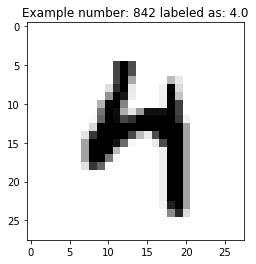

In [40]:
import matplotlib.pyplot as plt
def display_image(position):
    image = data_reshaped[position].squeeze()
    plt.title('Example number: ' + str(position) + " labeled as: " + str(labels[position]))
    plt.imshow(image, cmap=plt.cm.gray_r)
    plt.show()
    
display_image(842)

In [128]:
import keras.layers as layers
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard
from time import time
model = keras.Sequential()

model.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1)))
model.add(layers.AveragePooling2D())

model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(layers.AveragePooling2D())

model.add(layers.Flatten())

model.add(layers.Dense(units=120, activation='relu'))

model.add(layers.Dense(units=84, activation='relu'))

model.add(layers.Dense(units=10, activation = 'sigmoid'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
EPOCHS = 10
BATCH_SIZE = 128

train_generator = ImageDataGenerator().flow(X_train, y_train, batch_size=BATCH_SIZE)
validation_generator = ImageDataGenerator().flow(X_validation, y_validation, batch_size=BATCH_SIZE)

model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 30, 30, 6)         60        
_________________________________________________________________
average_pooling2d_48 (Averag (None, 15, 15, 6)         0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 13, 13, 16)        880       
_________________________________________________________________
average_pooling2d_49 (Averag (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_24 (Flatten)         (None, 576)               0         
_________________________________________________________________
dense_72 (Dense)             (None, 120)               69240     
_________________________________________________________________
dense_73 (Dense)             (None, 84)              

In [129]:
print('# of training images:', X_train.shape[0])
print('# of validation images:', X_validation.shape[0])

steps_per_epoch = X_train.shape[0]//BATCH_SIZE
validation_steps = X_validation.shape[0]//BATCH_SIZE

tensorboard = TensorBoard(log_dir="logs/{}".format(time()))
model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=EPOCHS, 
                    validation_data=validation_generator, validation_steps=validation_steps,  
                    shuffle=True, callbacks=[tensorboard])
                    


...
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation))

# of training images: 48000
# of validation images: 12000
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1991 - accuracy: 0.8995 - val_loss: 0.0779 - val_accuracy: 0.9789
